In [1]:
from utils import get_model_and_loader, get_loader_for_model, transform_data
import numpy as np
import torch
from torch.autograd import Variable
from torch import Tensor
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MODEL_PATH = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/models/allison_mr_knee_2d_sequential_newdata_uniform/1519081402/val0.4986041188240051_train0.4832608997821808_epoch30'
DATA_DIR = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-normalized'
SPLIT = 'train'

In [3]:
def showSampleImageGood(inputs):
    # why does the image have a white background?
    batchimg = inputs.cpu().data
    batchimg = batchimg.type('torch.ByteTensor').numpy()
    print(batchimg.shape)
    batchimg = batchimg.squeeze(0)
    batchimg = np.moveaxis(batchimg, 0, -1)
    sample = batchimg[15]
    print(np.amax(sample))
    plt.imshow(sample)

In [4]:
def showSampleImageReshaped(inputs):
    # view does not work as intended
    # colors indicate not lined up, also different slice from original
    batch_size, depth, num_slices, rows, cols = inputs.size()
    reshaped = inputs.view(-1, 3, rows, cols)
    slices = reshaped.cpu().data
    slices = slices.type('torch.ByteTensor').numpy()
    print(slices.shape)
    slices = np.moveaxis(slices, 1, -1)
    sample = slices[15]
    print(np.amax(sample))
    plt.imshow(sample)

In [5]:
def showSampleImageReshaped2(inputs):
    # view does not work as intended
    batch_size, depth, num_slices, rows, cols = inputs.size()
    reshaped = inputs.permute(0, 2, 1, 3, 4)
    reshaped = inputs.view(-1, depth, rows, cols)
    slices = reshaped.cpu().data
    slices = slices.type('torch.ByteTensor').numpy()
    print(slices.shape)
    slices = np.moveaxis(slices, 1, -1)
    sample = slices[15]
    print(np.amax(sample))
    plt.imshow(sample)

In [24]:
def showSampleImageReshaped3(inputs):
    # successful for batch size 1
    batch_size, depth, num_slices, rows, cols = inputs.size()
    reshaped = inputs.permute(0, 2, 1, 3, 4)
    reshaped = torch.squeeze(reshaped, dim=0)
    slices = reshaped.cpu().data
    print(type(slices))
    slices = slices.type('torch.ByteTensor').numpy()
    print(slices.shape)
    slices = np.moveaxis(slices, 1, -1)
    sample = slices[10]
    print(np.amax(sample))
    plt.imshow(sample)

In [7]:
def showSampleImageNumpy(inputs):
    # takes single numpy study with dims (3, 20, 256, 256)
    batchimg = np.moveaxis(inputs, 0, -1)
    print(batchimg.shape)
    sample = batchimg[25]
    print(np.amax(sample))
    plt.imshow(sample)

In [8]:
loader = get_loader_for_model(MODEL_PATH, SPLIT)

---Retrieved model args
---Loading data
Counter({4: 341, 1: 270, 2: 174})
Counter({4: 44, 1: 34, 2: 22})
Counter({4: 43, 1: 36, 2: 21})
Counter({4: 43, 1: 36, 2: 21})
---Data loading complete


In [9]:
for batch in loader:
    break

(0, 0, 24, 180)
(0, 0, 24, 180)
(0, 0, 89, 66)
(0, 0, 59, 239)
(0, 0, 89, 66)
(0, 0, 59, 239)
(0, 0, 17, 175)
(0, 0, 30, 140)
(0, 0, 105, 96)
(0, 0, 57, 158)
(0, 0, 17, 175)
(0, 0, 41, 173)
(0, 0, 105, 96)
(0, 0, 30, 140)
(0, 0, 57, 158)
(0, 0, 41, 173)
(0, 0, 67, 103)
(0, 0, 67, 103)
(0, 0, 17, 162)
(0, 0, 17, 162)
(0, 0, 9, 90)
(0, 0, 46, 200)
(0, 0, 9, 90)
(0, 0, 67, 135)
(0, 0, 46, 200)
(0, 0, 90, 124)
(0, 0, 67, 135)
(0, 0, 90, 124)
(0, 0, 66, 135)
(0, 0, 54, 148)
(0, 0, 66, 135)
(0, 0, 54, 148)
(0, 0, 52, 197)
(0, 0, 52, 197)


In [10]:
inputs, labels = transform_data(batch, True, 'valid')
type(inputs.data)
inputs_unorm = loader.dataset.unnormalize(inputs.data.cpu().numpy()).astype('B')
print(np.unravel_index(np.argmax(inputs_unorm), inputs_unorm.shape))
print(type(inputs_unorm))
inputs = Variable(torch.from_numpy(inputs_unorm))
print(type(inputs))

(0, 0, 0, 30, 140)
<class 'numpy.ndarray'>
<class 'torch.autograd.variable.Variable'>


In [11]:
inputs_np, label_np = loader.dataset[17]


(0, 0, 34, 128)
(0, 0, 34, 128)


In [12]:
inputs_np_unorm = loader.dataset.unnormalize(inputs_np)
type(inputs_np_unorm)

numpy.ndarray

(28, 256, 256, 3)
255


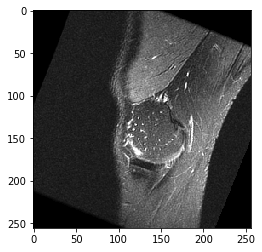

In [13]:
# inpus_np not necessarily same study as others bc not shuffled
showSampleImageNumpy(inputs_np_unorm.astype('B'))

(1, 3, 28, 256, 256)
255


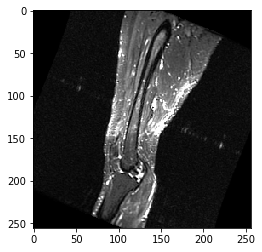

In [14]:
showSampleImageGood(inputs)

(28, 3, 256, 256)
255


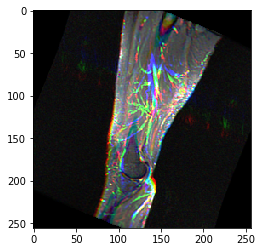

In [15]:
showSampleImageReshaped(inputs)

(28, 3, 256, 256)
255


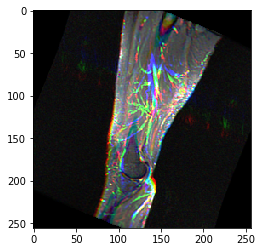

In [16]:
showSampleImageReshaped2(inputs)

<class 'torch.ByteTensor'>
(28, 3, 256, 256)
255


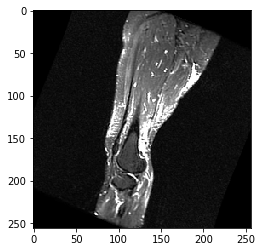

In [25]:
showSampleImageReshaped3(inputs)